In [9]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
from math import *


In [10]:
a = -1
b = 1

In [11]:
def f(x):        
    f = 1/(1 + 25*(x**2))
    return f


def g(n):
    g = np.arange(a,b+(b-a)/n ,(b-a)/n)
    return g

def Lag(x,y,m):         ## Funcion que genera los polinomios de Lagrange
    
    a = [1]*len(x)
    
    for i in range(len(x)):
        
        for j in range(len(x)):
            
            if j != i:
             
                a[i] *= ( m - x[j])/( x[i] - x[j]) 
                
    return sum(a[t]*y[t] for t in range(len(x)))

$ EN2=\frac{1}{m}\sqrt{\sum_{i=1}^m \left(\frac{p(x)-f(x)}{f(x)}\right)^2}$

In [12]:
def en2(h,n):
    k = 0
    m = np.arange(a,b+(b-a)/(n-1) ,(b-a)/(n-1))
    for i in range(n):
        k += ((Lag(g(h),f(g(h)),m)[i] - f(m)[i])/f(m)[i])**2
        
    print("para n=",h, "EN2=",(sqrt(k)/n))
    
en2(6,100)
en2(8,100)
en2(10,100)


para n= 6 EN2= 0.49573210917719307
para n= 8 EN2= 0.7666396265763353
para n= 10 EN2= 1.2860858008508709


In [13]:
def En2(h,n):
    s = 0
    m = np.arange(a,b+(b-a)/(n-1) ,(b-a)/(n-1))
    s= sum(((Lag(g(h),f(g(h)),m)-f(m))/f(m))**2)
    print(type(f(m)))
    print("para n=",n, "EN2=",(sqrt(s)/n))
    
En2(6,100)
En2(8,100)
En2(10,100)


<class 'numpy.ndarray'>
para n= 100 EN2= 0.49573210917719307
<class 'numpy.ndarray'>
para n= 100 EN2= 0.7666396265763353
<class 'numpy.ndarray'>
para n= 100 EN2= 1.2860858008508709



Interpolacion con rectas

In [255]:
def Nump(n):        ## Defino el numero de puntos a interpolar
    m = np.arange(a,b + (b-a)/(2*n-2),(b-a)/(n-1))
    return m


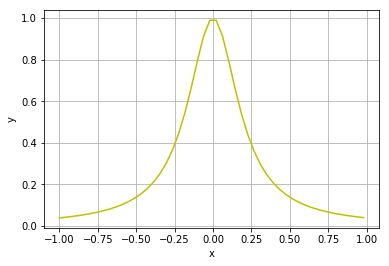

In [284]:
def Straight(xp,yp,n):   ## Genero las rectas
    
    m = [1]*(len(xp)-1)
    j = [1]*(len(xp)-1)
    z = [1]*(len(xp)-1)
    a = [0]
    b = [0]
    c = [0]*2
    
    for i in range(len(xp)-1):
        
        m[i] = (yp[i+1]-yp[i])/(xp[i+1]-xp[i])
        j[i] = np.arange(xp[i],xp[i+1],(xp[i+1]-xp[i])/n)
        a.extend(j[i])
        z[i] = (m[i]*j[i])+yp[i]-(m[i]*xp[i])
        b.extend(z[i])
        
    a.pop(0)
    b.pop(0)
    return a,b
 

plt.grid()

plt.xlabel('x')
plt.ylabel('y')

plt.plot(Straight(Nump(50),f(Nump(50)),2)[0],Straight(Nump(50),f(Nump(50)),2)[1],'y')

In [282]:
x_1 = Straight(Nump(50),f(Nump(50)),2)[0]   ## Se calcula el error para los puntos.
y_1 = Straight(Nump(50),f(Nump(50)),2)[1]

def en_2(x_1,y_1):
    h = len(x_1)
    k = 0
    
    for i in range(h):
        k += ((y_1[i] - f(x_1[i]))/f(x_1[i]))**2
        
    print("para n=",h, "EN2=",(sqrt(k)/h))

en_2(x_1,y_1)


para n= 98 EN2= 0.00028993211368463415
